In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df_hn = pd.read_csv('AQI_HaNoi_Done.csv')
df_dn = pd.read_csv('AQI_DaNang_Done.csv')
df_vt = pd.read_csv('AQI_VietTri_Done.csv')

df_hn.head()

,date,pm25,pm10,o3,no2,so2,co,year,AQI_pm25,AQI_pm10,AQI_o3,AQI_no2,AQI_so2,AQI_co,AQI
0,2019-01-01,85.0,32.0,20.0,14.0,12.0,9.0,NaN,153.571429,32.0,6.2500,7.0,4.8,45.0,153.571429
1,2019-01-02,70.0,31.0,15.0,21.0,5.0,4.0,NaN,133.333333,31.0,4.6875,10.5,2.0,20.0,133.333333
2,2019-01-03,33.0,49.0,8.0,10.0,13.0,5.0,NaN,66.000000,49.0,2.5000,5.0,5.2,25.0,66.000000
3,2019-01-04,73.0,50.0,13.0,23.0,7.0,10.0,NaN,138.333333,50.0,4.0625,11.5,2.8,50.0,138.333333
4,2019-01-05,34.0,42.0,22.0,12.0,13.0,10.0,NaN,68.000000,42.0,6.8750,6.0,5.2,50.0,68.000000


In [3]:
cols = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'AQI']
df_hn = df_hn[cols]
df_dn = df_dn[cols]
df_vt = df_vt[cols]

In [4]:
df_hn = df_hn.reset_index()['AQI']
df_dn = df_dn.reset_index()['AQI']
df_vt = df_vt.reset_index()['AQI']

df_hn

0       153.571429
1       133.333333
2        66.000000
3       138.333333
4        68.000000
           ...    
1882    120.000000
1883     94.000000
1884    154.285714
1885    108.333333
1886     92.000000
Name: AQI, Length: 1887, dtype: float64

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
df_hn = scaler.fit_transform(np.array(df_hn).reshape(-1,1))
df_dn = scaler.fit_transform(np.array(df_dn).reshape(-1,1))
df_vt = scaler.fit_transform(np.array(df_vt).reshape(-1,1))

print(df_hn.shape)
print(df_dn.shape)
print(df_dn.shape)

(1887, 1)
(1887, 1)
(1887, 1)


In [6]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Ha Noi

In [7]:
# Ha Noi
# train:test 7:3
train_size_7_3 = int(0.7 * len(df_hn))
test_size_7_3 = len(df_hn) - train_size_7_3

train_data_7_3 = df_hn[:train_size_7_3]
test_data_7_3 = df_hn[train_size_7_3:]

# train:test 8:2
train_size_8_2 = int(0.8 * len(df_hn))
test_size_8_2 = len(df_hn) - train_size_8_2

train_data_8_2 = df_hn[:train_size_8_2]
test_data_8_2 = df_hn[train_size_8_2:]

# train:test 9:1
train_size_9_1 = int(0.9 * len(df_hn))
test_size_9_1 = len(df_hn) - train_size_9_1

train_data_9_1 = df_hn[:train_size_9_1]
test_data_9_1 = df_hn[train_size_9_1:]

In [8]:
time_step = 100

X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [9]:
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0],X_train_7_3.shape[1] , 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0],X_test_7_3.shape[1] , 1)

X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0],X_train_8_2.shape[1] , 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0],X_test_8_2.shape[1] , 1)

X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0],X_train_9_1.shape[1] , 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0],X_test_9_1.shape[1] , 1)

## Ha Noi - train:test 7:3

In [10]:
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_7_3.fit(X_train_7_3, y_train_7_3, validation_data=(X_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 0.0685 - val_loss: 0.0276
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0255 - val_loss: 0.0246
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0235 - val_loss: 0.0237
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0239 - val_loss: 0.0246
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0230 - val_loss: 0.0235
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0236 - val_loss: 0.0235
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0220 - val_loss: 0.0233
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0227 - val_loss: 0.0262
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0264 - val_loss: 0.0234
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0226 - val_loss: 0.0238
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0233 - val_loss: 0.0237
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step

In [12]:
y_pred_7_3 = model_7_3.predict(X_test_7_3)
# y_pred_7_3

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [13]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
# y_pred_7_3

In [14]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

In [15]:
# 13. Dự báo 30 ngày tiếp theo
x_input_7_3=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3.shape

temp_input_7_3=list(x_input_7_3)
temp_input_7_3=temp_input_7_3[0].tolist()

from numpy import array

lst_output_7_3=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_7_3)>100):
        # print(temp_input_7_3)
        x_input_7_3=np.array(temp_input_7_3[1:])
        print("{} day input {}".format(i,x_input_7_3))
        x_input_7_3 = x_input_7_3.reshape(1,-1)
        x_input_7_3 = x_input_7_3.reshape((1, n_steps, 1))
        # print(x_input_7_3)
        yhat = model_7_3.predict(x_input_7_3, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_7_3.extend(yhat[0].tolist())
        temp_input_7_3=temp_input_7_3[1:]
        # print(temp_input_7_3)
        lst_output_7_3.extend(yhat.tolist())
        i=i+1
    else:
        x_input_7_3 = x_input_7_3.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3, verbose=0)
        print(yhat[0])
        temp_input_7_3.extend(yhat[0].tolist())
        print(len(temp_input_7_3))
        lst_output_7_3.extend(yhat.tolist())
        i=i+1


[0.37377253]
101
1 day input [0.73412698 0.70578231 0.69727891 0.77380952 0.78968254 0.88095238
 0.82142857 0.43650794 0.60090703 0.6122449  0.46296296 0.62641723
 0.61791383 0.6462585  0.68594104 0.70861678 0.52910053 0.55839002
 0.59807256 0.52910053 0.55555556 0.5026455  0.48941799 0.29761905
 0.6292517  0.38359788 0.38359788 0.59240363 0.58673469 0.68877551
 0.76190476 0.39021164 0.35714286 0.28174603 0.52248677 0.86111111
 0.90079365 0.64342404 0.70578231 0.58673469 0.46957672 0.6547619
 0.74206349 0.60941043 0.57823129 0.56405896 0.54138322 0.54421769
 0.34391534 0.18650794 0.54138322 0.6377551  0.61507937 0.59240363
 0.62641723 0.46957672 0.3968254  0.56689342 0.44973545 0.53854875
 0.32936508 0.46296296 0.56405896 0.6377551  0.62641723 0.56122449
 0.64058957 0.77380952 0.83333333 0.81349206 0.71995465 0.42989418
 0.40343915 0.44312169 0.52910053 0.50925926 0.3968254  0.43650794
 0.71145125 0.56689342 0.6292517  0.42328042 0.3968254  0.54138322
 0.64342404 0.56122449 0.45634921 

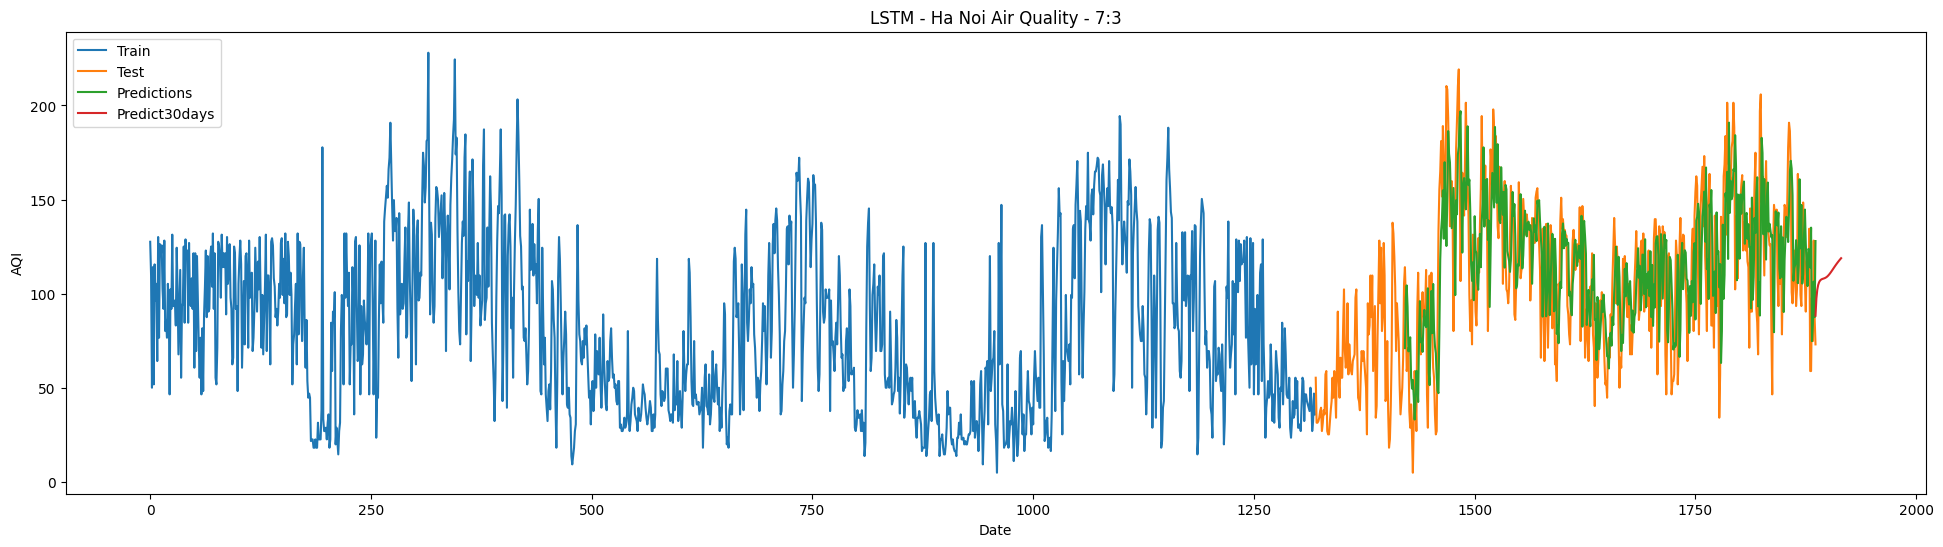

In [16]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3+101, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,(y_pred_7_3))

prediect_data_index = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_7_3))

plt.title('LSTM - Ha Noi Air Quality - 7:3')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [17]:
rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 26.522529571299046
MAE: 21.125499283821267
MAPE: 0.24122690891390663


## Ha Noi - train:test 8:2

In [18]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model_8_2.fit(X_train_8_2, y_train_8_2, validation_data=(X_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0663 - val_loss: 0.0212
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0266 - val_loss: 0.0213
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0246 - val_loss: 0.0212
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0237 - val_loss: 0.0219
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0242 - val_loss: 0.0206
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0236 - val_loss: 0.0205
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0216 - val_loss: 0.0206
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0217 - val_loss: 0.0210
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0227 - val_loss: 0.0203
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0243 - val_loss: 0.0204
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0219 - val_loss: 0.0197
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0

In [20]:
y_pred_8_2 = model_8_2.predict(X_test_8_2)
# y_pred_8_2

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [21]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
# y_pred_8_2

In [22]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

In [23]:
x_input_8_2=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2.shape

temp_input_8_2=list(x_input_8_2)
temp_input_8_2=temp_input_8_2[0].tolist()

from numpy import array

lst_output_8_2=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_8_2)>100):
        # print(temp_input_8_2)
        x_input_8_2=np.array(temp_input_8_2[1:])
        print("{} day input {}".format(i,x_input_8_2))
        x_input_8_2 = x_input_8_2.reshape(1,-1)
        x_input_8_2 = x_input_8_2.reshape((1, n_steps, 1))
        # print(x_input_8_2)
        yhat = model_8_2.predict(x_input_8_2, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_8_2.extend(yhat[0].tolist())
        temp_input_8_2=temp_input_8_2[1:]
        # print(temp_input_8_2)
        lst_output_8_2.extend(yhat.tolist())
        i=i+1
    else:
        x_input_8_2 = x_input_8_2.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2, verbose=0)
        print(yhat[0])
        temp_input_8_2.extend(yhat[0].tolist())
        print(len(temp_input_8_2))
        lst_output_8_2.extend(yhat.tolist())
        i=i+1

[0.3605024]
101
1 day input [0.73412698 0.70578231 0.69727891 0.77380952 0.78968254 0.88095238
 0.82142857 0.43650794 0.60090703 0.6122449  0.46296296 0.62641723
 0.61791383 0.6462585  0.68594104 0.70861678 0.52910053 0.55839002
 0.59807256 0.52910053 0.55555556 0.5026455  0.48941799 0.29761905
 0.6292517  0.38359788 0.38359788 0.59240363 0.58673469 0.68877551
 0.76190476 0.39021164 0.35714286 0.28174603 0.52248677 0.86111111
 0.90079365 0.64342404 0.70578231 0.58673469 0.46957672 0.6547619
 0.74206349 0.60941043 0.57823129 0.56405896 0.54138322 0.54421769
 0.34391534 0.18650794 0.54138322 0.6377551  0.61507937 0.59240363
 0.62641723 0.46957672 0.3968254  0.56689342 0.44973545 0.53854875
 0.32936508 0.46296296 0.56405896 0.6377551  0.62641723 0.56122449
 0.64058957 0.77380952 0.83333333 0.81349206 0.71995465 0.42989418
 0.40343915 0.44312169 0.52910053 0.50925926 0.3968254  0.43650794
 0.71145125 0.56689342 0.6292517  0.42328042 0.3968254  0.54138322
 0.64342404 0.56122449 0.45634921 0

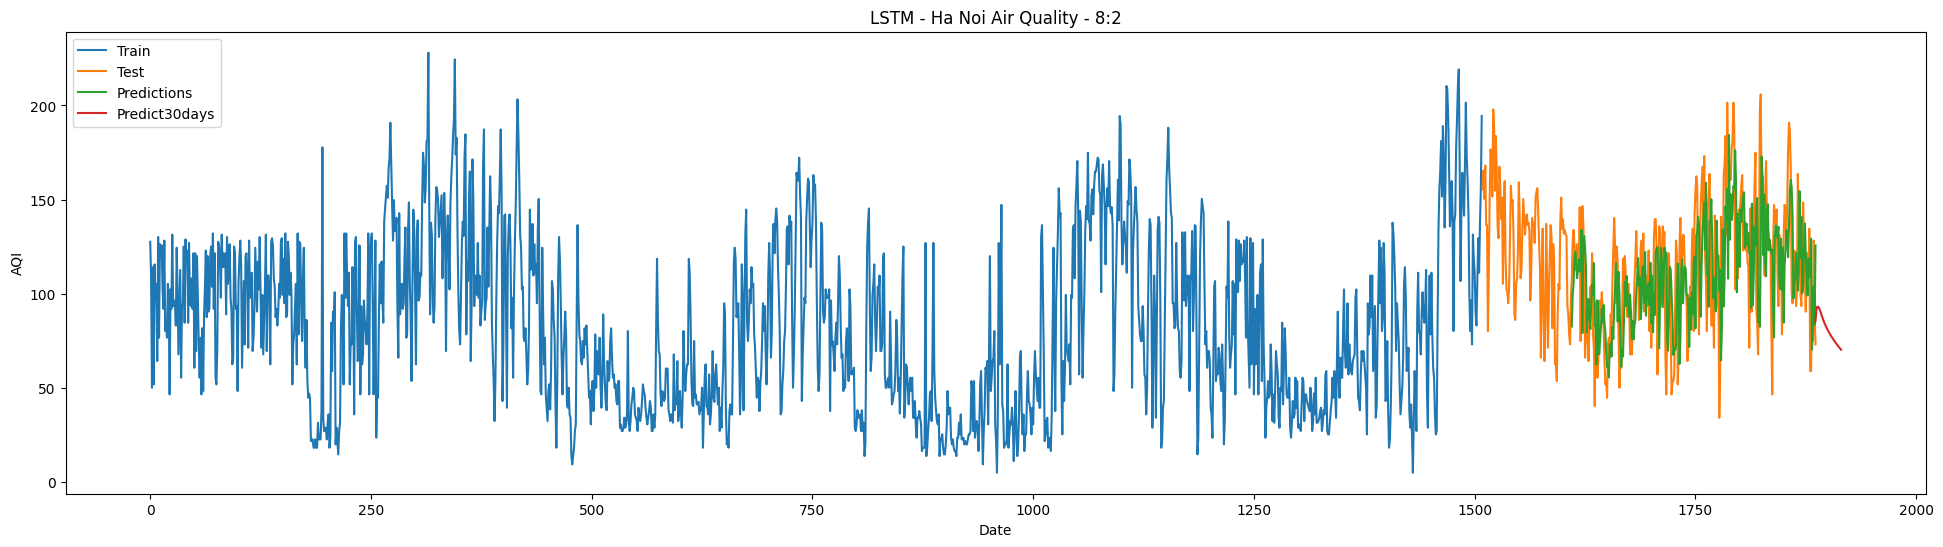

In [24]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2+101, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,(y_pred_8_2))

prediect_data_index = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_8_2))

plt.title('LSTM - Ha Noi Air Quality - 8:2')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 27.34221777071665
MAE: 21.751727864717232
MAPE: 0.2181266507611288


## Ha Noi - train:test 9:1

In [26]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model_9_1.fit(X_train_9_1, y_train_9_1, validation_data=(X_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0594 - val_loss: 0.0212
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0232 - val_loss: 0.0210
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0238 - val_loss: 0.0212
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0208 - val_loss: 0.0214
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0222 - val_loss: 0.0211
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0223 - val_loss: 0.0212
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0219 - val_loss: 0.0213
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0225 - val_loss: 0.0206
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0212 - val_loss: 0.0228
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0222 - val_loss: 0.0206
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step

In [28]:
y_pred_9_1 = model_9_1.predict(X_test_9_1)
# y_pred_9_1

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


In [29]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
# y_pred_9_1

In [30]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

In [31]:
x_input_9_1=test_data_9_1[-100:].reshape(1,-1)
x_input_9_1.shape

temp_input_9_1=list(x_input_9_1)
temp_input_9_1=temp_input_9_1[0].tolist()

from numpy import array

lst_output_9_1=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_9_1)>100):
        # print(temp_input_9_1)
        x_input_9_1=np.array(temp_input_9_1[1:])
        print("{} day input {}".format(i,x_input_9_1))
        x_input_9_1 = x_input_9_1.reshape(1,-1)
        x_input_9_1 = x_input_9_1.reshape((1, n_steps, 1))
        # print(x_input_9_1)
        yhat = model_9_1.predict(x_input_9_1, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_9_1.extend(yhat[0].tolist())
        temp_input_9_1=temp_input_9_1[1:]
        # print(temp_input_9_1)
        lst_output_9_1.extend(yhat.tolist())
        i=i+1
    else:
        x_input_9_1 = x_input_9_1.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1, verbose=0)
        print(yhat[0])
        temp_input_9_1.extend(yhat[0].tolist())
        print(len(temp_input_9_1))
        lst_output_9_1.extend(yhat.tolist())
        i=i+1

[0.37162712]
101
1 day input [0.73412698 0.70578231 0.69727891 0.77380952 0.78968254 0.88095238
 0.82142857 0.43650794 0.60090703 0.6122449  0.46296296 0.62641723
 0.61791383 0.6462585  0.68594104 0.70861678 0.52910053 0.55839002
 0.59807256 0.52910053 0.55555556 0.5026455  0.48941799 0.29761905
 0.6292517  0.38359788 0.38359788 0.59240363 0.58673469 0.68877551
 0.76190476 0.39021164 0.35714286 0.28174603 0.52248677 0.86111111
 0.90079365 0.64342404 0.70578231 0.58673469 0.46957672 0.6547619
 0.74206349 0.60941043 0.57823129 0.56405896 0.54138322 0.54421769
 0.34391534 0.18650794 0.54138322 0.6377551  0.61507937 0.59240363
 0.62641723 0.46957672 0.3968254  0.56689342 0.44973545 0.53854875
 0.32936508 0.46296296 0.56405896 0.6377551  0.62641723 0.56122449
 0.64058957 0.77380952 0.83333333 0.81349206 0.71995465 0.42989418
 0.40343915 0.44312169 0.52910053 0.50925926 0.3968254  0.43650794
 0.71145125 0.56689342 0.6292517  0.42328042 0.3968254  0.54138322
 0.64342404 0.56122449 0.45634921 

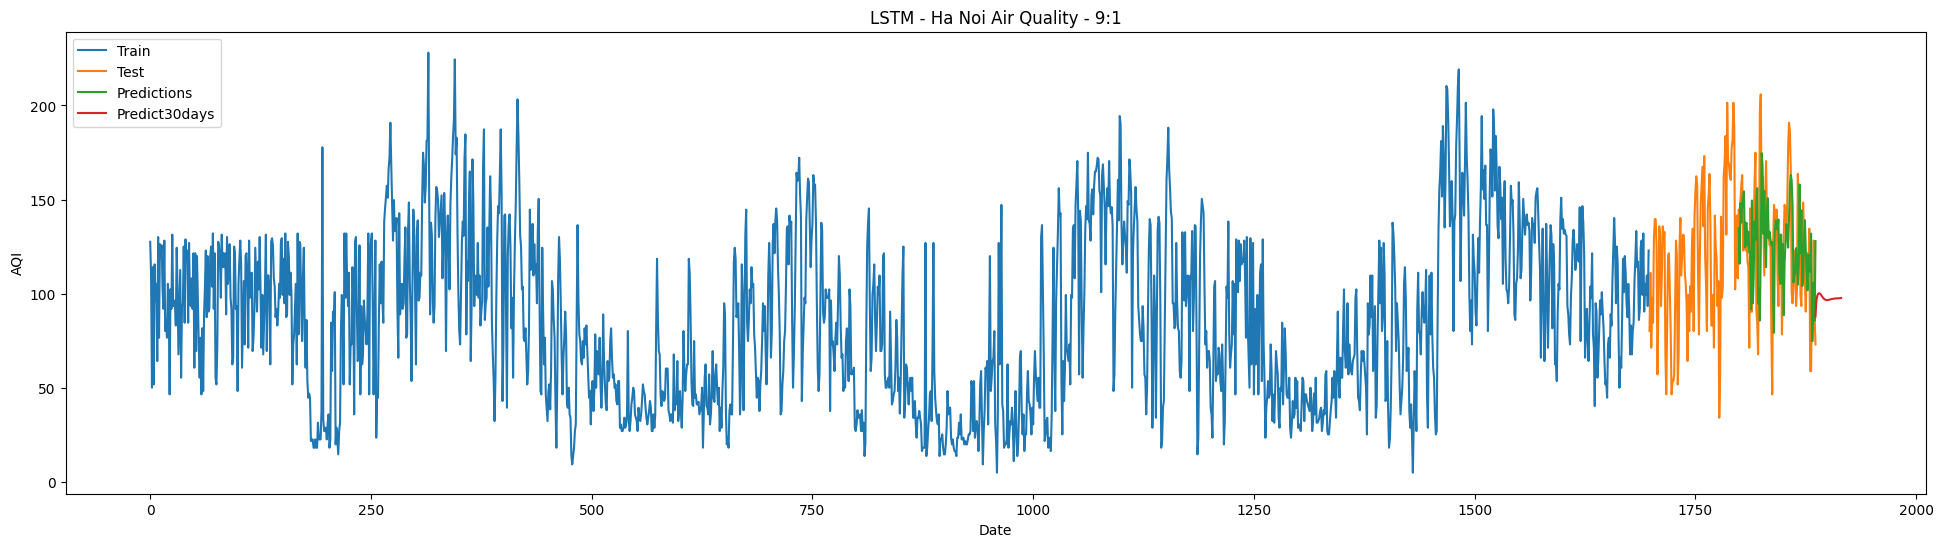

In [32]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1+101, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,(y_pred_9_1))

prediect_data_index = pd.RangeIndex(start=len(df_hn)-1, stop=len(df_hn)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_9_1))

plt.title('LSTM - Ha Noi Air Quality - 9:1')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [33]:
rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 28.2968584361255
MAE: 22.562941538560985
MAPE: 0.20871860793593333


# Da Nang

In [34]:
# Da Nang
# train:test 7:3
train_size_7_3 = int(0.7 * len(df_dn))
test_size_7_3 = len(df_dn) - train_size_7_3

train_data_7_3 = df_dn[:train_size_7_3]
test_data_7_3 = df_dn[train_size_7_3:]

# train:test 8:2
train_size_8_2 = int(0.8 * len(df_dn))
test_size_8_2 = len(df_dn) - train_size_8_2

train_data_8_2 = df_dn[:train_size_8_2]
test_data_8_2 = df_dn[train_size_8_2:]

# train:test 9:1
train_size_9_1 = int(0.9 * len(df_dn))
test_size_9_1 = len(df_dn) - train_size_9_1

train_data_9_1 = df_dn[:train_size_9_1]
test_data_9_1 = df_dn[train_size_9_1:]

In [35]:
time_step = 100

X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [36]:
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0],X_train_7_3.shape[1] , 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0],X_test_7_3.shape[1] , 1)

X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0],X_train_8_2.shape[1] , 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0],X_test_8_2.shape[1] , 1)

X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0],X_train_9_1.shape[1] , 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0],X_test_9_1.shape[1] , 1)

## Da Nang - train:test 7:3

In [37]:
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model_7_3.fit(X_train_7_3, y_train_7_3, validation_data=(X_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.0273 - val_loss: 0.0198
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0090 - val_loss: 0.0194
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0091 - val_loss: 0.0188
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0086 - val_loss: 0.0184
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0093 - val_loss: 0.0180
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0090 - val_loss: 0.0179
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0084 - val_loss: 0.0173
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0082 - val_loss: 0.0168
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0077 - val_loss: 0.0168
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0087 - val_loss: 0.0168
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0075 - val_loss: 0.0167
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step

In [39]:
y_pred_7_3 = model_7_3.predict(X_test_7_3)
# y_pred_7_3

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [40]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
# y_pred_7_3

In [41]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

In [42]:
x_input_7_3=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3.shape

temp_input_7_3=list(x_input_7_3)
temp_input_7_3=temp_input_7_3[0].tolist()

from numpy import array

lst_output_7_3=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_7_3)>100):
        # print(temp_input_7_3)
        x_input_7_3=np.array(temp_input_7_3[1:])
        print("{} day input {}".format(i,x_input_7_3))
        x_input_7_3 = x_input_7_3.reshape(1,-1)
        x_input_7_3 = x_input_7_3.reshape((1, n_steps, 1))
        # print(x_input_7_3)
        yhat = model_7_3.predict(x_input_7_3, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_7_3.extend(yhat[0].tolist())
        temp_input_7_3=temp_input_7_3[1:]
        # print(temp_input_7_3)
        lst_output_7_3.extend(yhat.tolist())
        i=i+1
    else:
        x_input_7_3 = x_input_7_3.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3, verbose=0)
        print(yhat[0])
        temp_input_7_3.extend(yhat[0].tolist())
        print(len(temp_input_7_3))
        lst_output_7_3.extend(yhat.tolist())
        i=i+1

[0.14576511]
101
1 day input [0.35404896 0.58757062 0.29284369 0.16949153 0.33521657 0.65254237
 0.33050847 0.12429379 0.09039548 0.07344633 0.04519774 0.05649718
 0.1200565  0.40920097 0.1299435  0.24293785 0.52017756 0.18644068
 0.36346516 0.35404896 0.33521657 0.09039548 0.10734463 0.06779661
 0.16949153 0.49798224 0.10169492 0.04007768 0.01977401 0.03036723
 0.02259887 0.06214689 0.1299435  0.04519774 0.04537429 0.15254237
 0.33992467 0.6299435  0.53026634 0.46973366 0.42332526 0.20338983
 0.1920904  0.15819209 0.19774011 0.14689266 0.23728814 0.2693032
 0.16384181 0.15254237 0.23728814 0.1920904  0.11864407 0.11299435
 0.16949153 0.13559322 0.10169492 0.22033898 0.29755179 0.2645951
 0.24858757 0.19774011 0.02418785 0.02824859 0.05084746 0.02824859
 0.08474576 0.22033898 0.28813559 0.40112994 0.35404896 0.29284369
 0.29284369 0.18644068 0.12429379 0.15819209 0.16384181 0.04713983
 0.02259887 0.08474576 0.13559322 0.20338983 0.16949153 0.12429379
 0.14689266 0.16384181 0.14124294 0

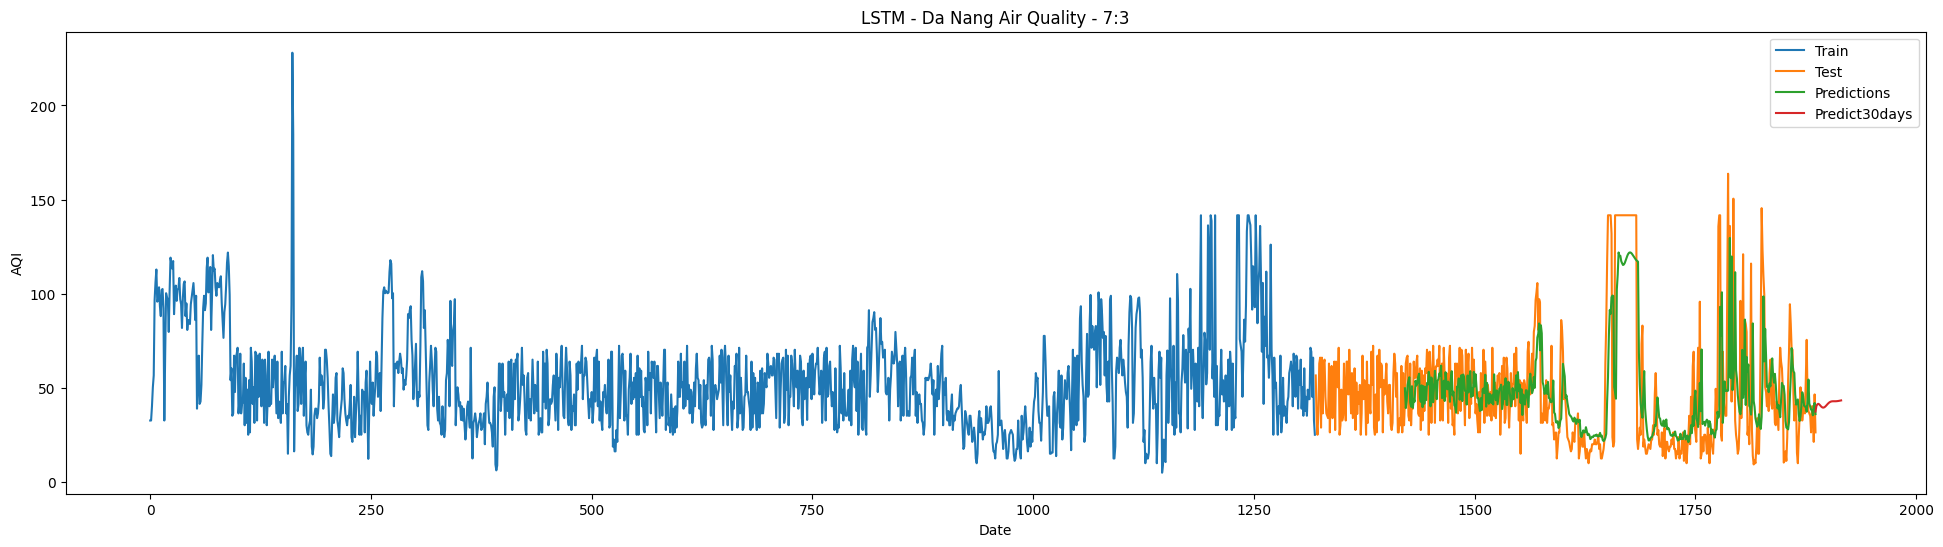

In [43]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3+101, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,(y_pred_7_3))

prediect_data_index = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_7_3))

plt.title('LSTM - Da Nang Air Quality - 7:3')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [44]:
rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 23.180757715903955
MAE: 16.839686933099536
MAPE: 0.458296798383919


## Da Nang - train:test 8:2

In [45]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
model_8_2.fit(X_train_8_2, y_train_8_2, validation_data=(X_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0233 - val_loss: 0.0286
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0091 - val_loss: 0.0278
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0084 - val_loss: 0.0271
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0079 - val_loss: 0.0263
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0081 - val_loss: 0.0257
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0091 - val_loss: 0.0254
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0080 - val_loss: 0.0251
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0085 - val_loss: 0.0246
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0089 - val_loss: 0.0244
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0079 - val_loss: 0.0241
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0088 - val_loss: 0.0239
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

In [47]:
y_pred_8_2 = model_8_2.predict(X_test_8_2)
# y_pred_8_2

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [48]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
# y_pred_8_2

In [49]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

In [50]:
x_input_8_2=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2.shape

temp_input_8_2=list(x_input_8_2)
temp_input_8_2=temp_input_8_2[0].tolist()

from numpy import array

lst_output_8_2=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_8_2)>100):
        # print(temp_input_8_2)
        x_input_8_2=np.array(temp_input_8_2[1:])
        print("{} day input {}".format(i,x_input_8_2))
        x_input_8_2 = x_input_8_2.reshape(1,-1)
        x_input_8_2 = x_input_8_2.reshape((1, n_steps, 1))
        # print(x_input_8_2)
        yhat = model_8_2.predict(x_input_8_2, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_8_2.extend(yhat[0].tolist())
        temp_input_8_2=temp_input_8_2[1:]
        # print(temp_input_8_2)
        lst_output_8_2.extend(yhat.tolist())
        i=i+1
    else:
        x_input_8_2 = x_input_8_2.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2, verbose=0)
        print(yhat[0])
        temp_input_8_2.extend(yhat[0].tolist())
        print(len(temp_input_8_2))
        lst_output_8_2.extend(yhat.tolist())
        i=i+1

[0.14299804]
101
1 day input [0.35404896 0.58757062 0.29284369 0.16949153 0.33521657 0.65254237
 0.33050847 0.12429379 0.09039548 0.07344633 0.04519774 0.05649718
 0.1200565  0.40920097 0.1299435  0.24293785 0.52017756 0.18644068
 0.36346516 0.35404896 0.33521657 0.09039548 0.10734463 0.06779661
 0.16949153 0.49798224 0.10169492 0.04007768 0.01977401 0.03036723
 0.02259887 0.06214689 0.1299435  0.04519774 0.04537429 0.15254237
 0.33992467 0.6299435  0.53026634 0.46973366 0.42332526 0.20338983
 0.1920904  0.15819209 0.19774011 0.14689266 0.23728814 0.2693032
 0.16384181 0.15254237 0.23728814 0.1920904  0.11864407 0.11299435
 0.16949153 0.13559322 0.10169492 0.22033898 0.29755179 0.2645951
 0.24858757 0.19774011 0.02418785 0.02824859 0.05084746 0.02824859
 0.08474576 0.22033898 0.28813559 0.40112994 0.35404896 0.29284369
 0.29284369 0.18644068 0.12429379 0.15819209 0.16384181 0.04713983
 0.02259887 0.08474576 0.13559322 0.20338983 0.16949153 0.12429379
 0.14689266 0.16384181 0.14124294 0

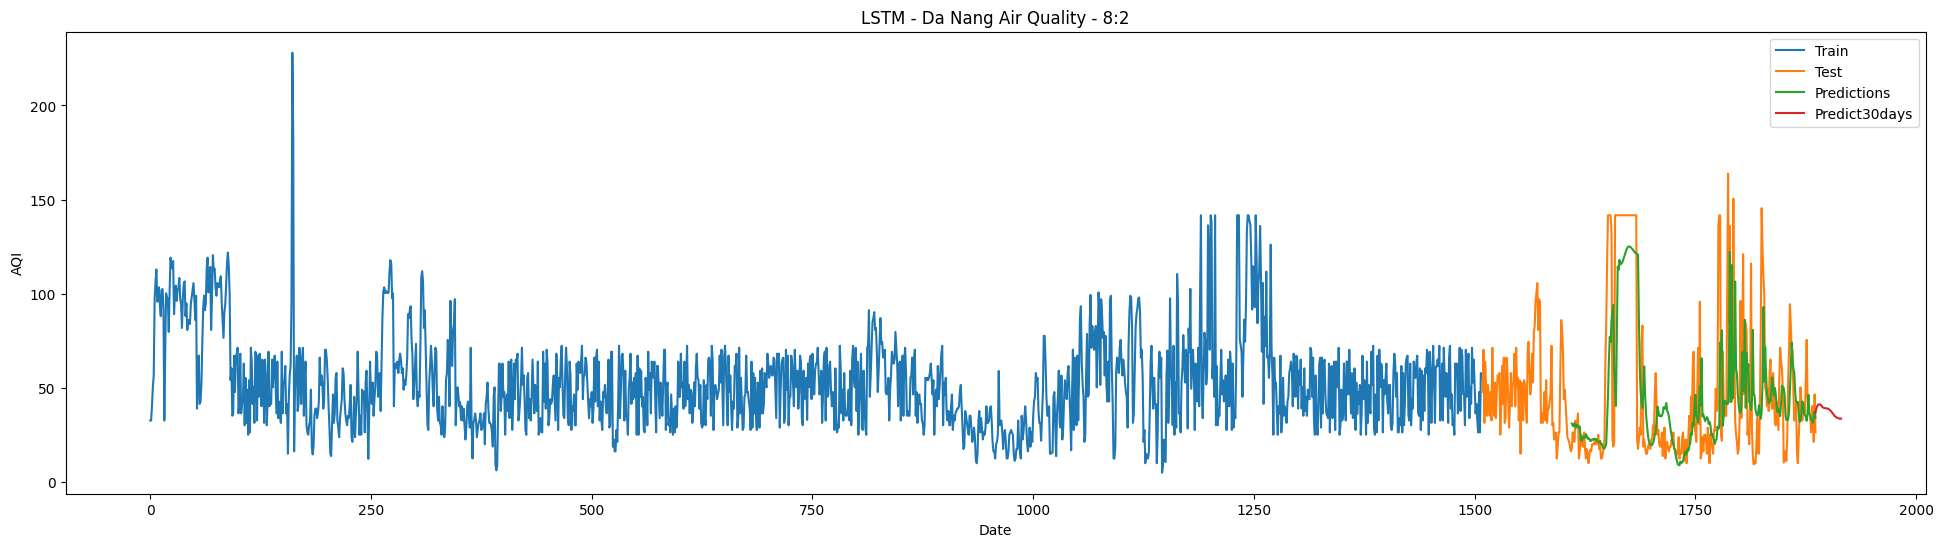

In [51]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2+101, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,(y_pred_8_2))

prediect_data_index = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_8_2))

plt.title('LSTM - Da Nang Air Quality - 8:2')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [52]:
rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 28.425373906499807
MAE: 19.45727585592341
MAPE: 0.5569382838304536


## Da Nang - train:test 9:1

In [53]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [54]:
model_9_1.fit(X_train_9_1, y_train_9_1, validation_data=(X_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0282 - val_loss: 0.0202
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0111 - val_loss: 0.0190
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0092 - val_loss: 0.0200
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0104 - val_loss: 0.0209
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0093 - val_loss: 0.0217
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0090 - val_loss: 0.0234
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0102 - val_loss: 0.0211
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0089 - val_loss: 0.0220
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0092 - val_loss: 0.0213
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0101 - val_loss: 0.0201
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0092 - val_loss: 0.0209
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step

In [55]:
y_pred_9_1 = model_9_1.predict(X_test_9_1)
# y_pred_9_1

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step


In [56]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
# y_pred_9_1

In [57]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

In [58]:
x_input_9_1=test_data_9_1[-100:].reshape(1,-1)
x_input_9_1.shape

temp_input_9_1=list(x_input_9_1)
temp_input_9_1=temp_input_9_1[0].tolist()

from numpy import array

lst_output_9_1=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_9_1)>100):
        # print(temp_input_9_1)
        x_input_9_1=np.array(temp_input_9_1[1:])
        print("{} day input {}".format(i,x_input_9_1))
        x_input_9_1 = x_input_9_1.reshape(1,-1)
        x_input_9_1 = x_input_9_1.reshape((1, n_steps, 1))
        # print(x_input_9_1)
        yhat = model_9_1.predict(x_input_9_1, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_9_1.extend(yhat[0].tolist())
        temp_input_9_1=temp_input_9_1[1:]
        # print(temp_input_9_1)
        lst_output_9_1.extend(yhat.tolist())
        i=i+1
    else:
        x_input_9_1 = x_input_9_1.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1, verbose=0)
        print(yhat[0])
        temp_input_9_1.extend(yhat[0].tolist())
        print(len(temp_input_9_1))
        lst_output_9_1.extend(yhat.tolist())
        i=i+1

[0.16484688]
101
1 day input [0.35404896 0.58757062 0.29284369 0.16949153 0.33521657 0.65254237
 0.33050847 0.12429379 0.09039548 0.07344633 0.04519774 0.05649718
 0.1200565  0.40920097 0.1299435  0.24293785 0.52017756 0.18644068
 0.36346516 0.35404896 0.33521657 0.09039548 0.10734463 0.06779661
 0.16949153 0.49798224 0.10169492 0.04007768 0.01977401 0.03036723
 0.02259887 0.06214689 0.1299435  0.04519774 0.04537429 0.15254237
 0.33992467 0.6299435  0.53026634 0.46973366 0.42332526 0.20338983
 0.1920904  0.15819209 0.19774011 0.14689266 0.23728814 0.2693032
 0.16384181 0.15254237 0.23728814 0.1920904  0.11864407 0.11299435
 0.16949153 0.13559322 0.10169492 0.22033898 0.29755179 0.2645951
 0.24858757 0.19774011 0.02418785 0.02824859 0.05084746 0.02824859
 0.08474576 0.22033898 0.28813559 0.40112994 0.35404896 0.29284369
 0.29284369 0.18644068 0.12429379 0.15819209 0.16384181 0.04713983
 0.02259887 0.08474576 0.13559322 0.20338983 0.16949153 0.12429379
 0.14689266 0.16384181 0.14124294 0

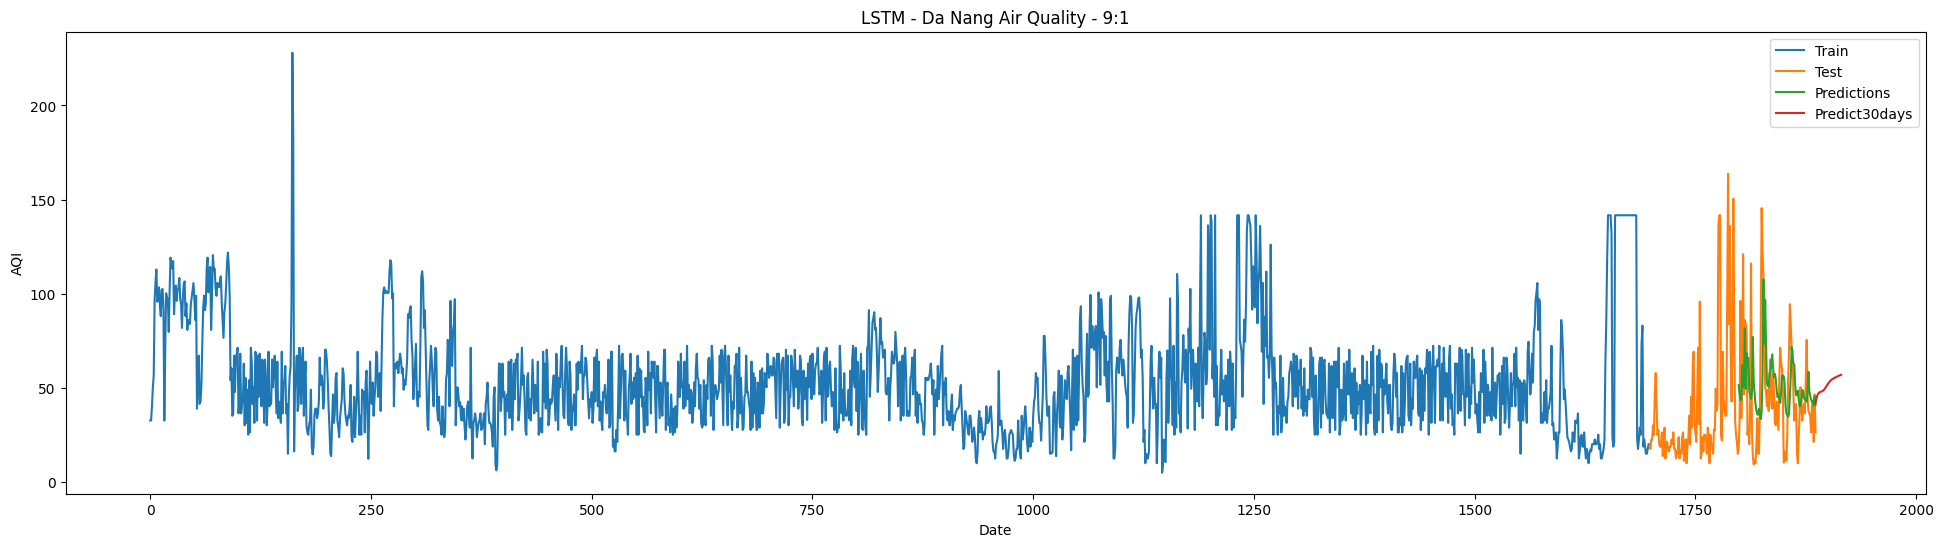

In [59]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1+101, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,(y_pred_9_1))

prediect_data_index = pd.RangeIndex(start=len(df_dn)-1, stop=len(df_dn)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_9_1))

plt.title('LSTM - Da Nang Air Quality - 9:1')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 25.496620003391392
MAE: 19.52939383983087
MAPE: 0.7064063580204117


# Viet tri

In [61]:
# Da Nang
# train:test 7:3
train_size_7_3 = int(0.7 * len(df_vt))
test_size_7_3 = len(df_vt) - train_size_7_3

train_data_7_3 = df_vt[:train_size_7_3]
test_data_7_3 = df_vt[train_size_7_3:]

# train:test 8:2
train_size_8_2 = int(0.8 * len(df_vt))
test_size_8_2 = len(df_vt) - train_size_8_2

train_data_8_2 = df_vt[:train_size_8_2]
test_data_8_2 = df_vt[train_size_8_2:]

# train:test 9:1
train_size_9_1 = int(0.9 * len(df_vt))
test_size_9_1 = len(df_vt) - train_size_9_1

train_data_9_1 = df_vt[:train_size_9_1]
test_data_9_1 = df_vt[train_size_9_1:]

In [62]:
time_step = 100

X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [63]:
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0],X_train_7_3.shape[1] , 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0],X_test_7_3.shape[1] , 1)

X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0],X_train_8_2.shape[1] , 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0],X_test_8_2.shape[1] , 1)

X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0],X_train_9_1.shape[1] , 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0],X_test_9_1.shape[1] , 1)

## Viet Tri - train:test 7:3

In [64]:
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [65]:
model_7_3.fit(X_train_7_3, y_train_7_3, validation_data=(X_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 0.0511 - val_loss: 0.0239
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0226 - val_loss: 0.0236
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0208 - val_loss: 0.0231
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0209 - val_loss: 0.0230
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0192 - val_loss: 0.0226
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0203 - val_loss: 0.0235
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0205 - val_loss: 0.0265
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 0.0219 - val_loss: 0.0233
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0196 - val_loss: 0.0215
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.0194 - val_loss: 0.0220
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0184 - val_loss: 0.0223
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step

In [66]:
y_pred_7_3 = model_7_3.predict(X_test_7_3)
# y_pred_7_3

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


In [67]:
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
# y_pred_7_3

In [68]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

In [69]:
x_input_7_3=test_data_7_3[-100:].reshape(1,-1)
x_input_7_3.shape

temp_input_7_3=list(x_input_7_3)
temp_input_7_3=temp_input_7_3[0].tolist()

from numpy import array

lst_output_7_3=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_7_3)>100):
        # print(temp_input_7_3)
        x_input_7_3=np.array(temp_input_7_3[1:])
        print("{} day input {}".format(i,x_input_7_3))
        x_input_7_3 = x_input_7_3.reshape(1,-1)
        x_input_7_3 = x_input_7_3.reshape((1, n_steps, 1))
        # print(x_input_7_3)
        yhat = model_7_3.predict(x_input_7_3, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_7_3.extend(yhat[0].tolist())
        temp_input_7_3=temp_input_7_3[1:]
        # print(temp_input_7_3)
        lst_output_7_3.extend(yhat.tolist())
        i=i+1
    else:
        x_input_7_3 = x_input_7_3.reshape((1, n_steps,1))
        yhat = model_7_3.predict(x_input_7_3, verbose=0)
        print(yhat[0])
        temp_input_7_3.extend(yhat[0].tolist())
        print(len(temp_input_7_3))
        lst_output_7_3.extend(yhat.tolist())
        i=i+1

[0.22142732]
101
1 day input [0.69506726 0.68225496 0.61285501 0.66944266 0.72069186 0.76873799
 0.75592569 0.29147982 0.42600897 0.56053812 0.29147982 0.34529148
 0.31838565 0.31838565 0.67584881 0.67584881 0.71748879 0.71748879
 0.66303652 0.56801196 0.61285501 0.53064275 0.4857997  0.2735426
 0.32735426 0.22869955 0.15695067 0.37219731 0.44843049 0.4857997
 0.54559043 0.53811659 0.68545804 0.68866111 0.65022422 0.69186419
 0.67905189 0.54559043 0.61285501 0.65342729 0.39013453 0.52316891
 0.47085202 0.46337818 0.5754858  0.54559043 0.50074738 0.30941704
 0.13901345 0.06726457 0.13901345 0.30941704 0.4857997  0.39910314
 0.30044843 0.15695067 0.42600897 0.23766816 0.47832586 0.39910314
 0.34529148 0.28251121 0.45590433 0.49327354 0.52316891 0.38116592
 0.43348281 0.56801196 0.32735426 0.26457399 0.39910314 0.49327354
 0.42600897 0.47832586 0.64275037 0.53811659 0.20179372 0.20179372
 0.44843049 0.20179372 0.40807175 0.41704036 0.37219731 0.34529148
 0.59790732 0.53811659 0.43348281 0

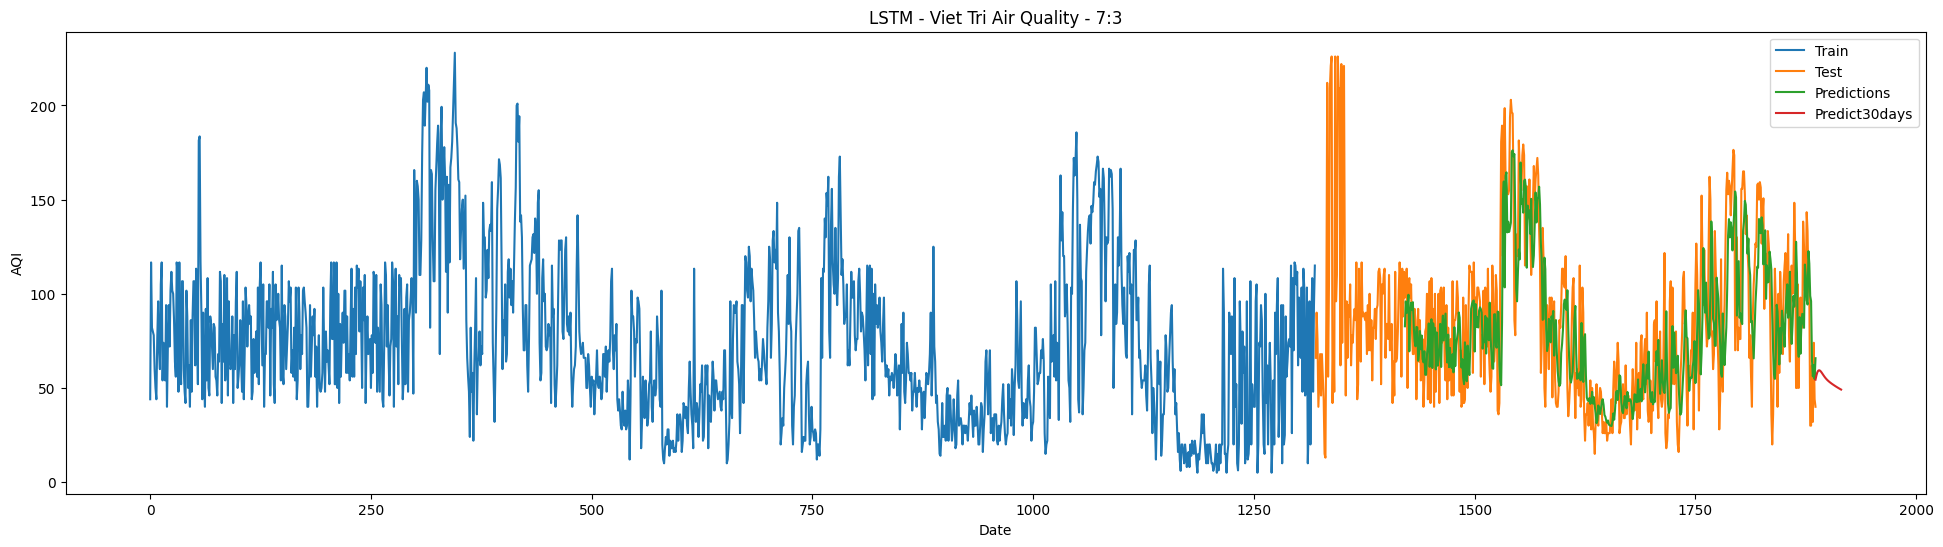

In [70]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))

test_data_index = pd.RangeIndex(start=train_size_7_3+101, stop=train_size_7_3+test_size_7_3, step=1)
plt.plot(test_data_index,(y_pred_7_3))

prediect_data_index = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_7_3))

plt.title('LSTM - Viet Tri Air Quality - 7:3')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [71]:
rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 27.15136976292416
MAE: 21.86858123313082
MAPE: 0.33290434425304144


## Viet Tri - train:test 8:2

In [72]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
model_8_2.fit(X_train_8_2, y_train_8_2, validation_data=(X_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0662 - val_loss: 0.0236
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0254 - val_loss: 0.0228
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0226 - val_loss: 0.0225
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0234 - val_loss: 0.0226
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0209 - val_loss: 0.0220
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0209 - val_loss: 0.0227
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0208 - val_loss: 0.0217
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0214 - val_loss: 0.0220
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0206 - val_loss: 0.0211
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0216 - val_loss: 0.0211
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0194 - val_loss: 0.0204
Epoch 12/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step

In [74]:
y_pred_8_2 = model_8_2.predict(X_test_8_2)
# y_pred_8_2

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [75]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
# y_pred_8_2

In [76]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

In [77]:
x_input_8_2=test_data_8_2[-100:].reshape(1,-1)
x_input_8_2.shape

temp_input_8_2=list(x_input_8_2)
temp_input_8_2=temp_input_8_2[0].tolist()

from numpy import array

lst_output_8_2=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_8_2)>100):
        # print(temp_input_8_2)
        x_input_8_2=np.array(temp_input_8_2[1:])
        print("{} day input {}".format(i,x_input_8_2))
        x_input_8_2 = x_input_8_2.reshape(1,-1)
        x_input_8_2 = x_input_8_2.reshape((1, n_steps, 1))
        # print(x_input_8_2)
        yhat = model_8_2.predict(x_input_8_2, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_8_2.extend(yhat[0].tolist())
        temp_input_8_2=temp_input_8_2[1:]
        # print(temp_input_8_2)
        lst_output_8_2.extend(yhat.tolist())
        i=i+1
    else:
        x_input_8_2 = x_input_8_2.reshape((1, n_steps,1))
        yhat = model_8_2.predict(x_input_8_2, verbose=0)
        print(yhat[0])
        temp_input_8_2.extend(yhat[0].tolist())
        print(len(temp_input_8_2))
        lst_output_8_2.extend(yhat.tolist())
        i=i+1

[0.23790757]
101
1 day input [0.69506726 0.68225496 0.61285501 0.66944266 0.72069186 0.76873799
 0.75592569 0.29147982 0.42600897 0.56053812 0.29147982 0.34529148
 0.31838565 0.31838565 0.67584881 0.67584881 0.71748879 0.71748879
 0.66303652 0.56801196 0.61285501 0.53064275 0.4857997  0.2735426
 0.32735426 0.22869955 0.15695067 0.37219731 0.44843049 0.4857997
 0.54559043 0.53811659 0.68545804 0.68866111 0.65022422 0.69186419
 0.67905189 0.54559043 0.61285501 0.65342729 0.39013453 0.52316891
 0.47085202 0.46337818 0.5754858  0.54559043 0.50074738 0.30941704
 0.13901345 0.06726457 0.13901345 0.30941704 0.4857997  0.39910314
 0.30044843 0.15695067 0.42600897 0.23766816 0.47832586 0.39910314
 0.34529148 0.28251121 0.45590433 0.49327354 0.52316891 0.38116592
 0.43348281 0.56801196 0.32735426 0.26457399 0.39910314 0.49327354
 0.42600897 0.47832586 0.64275037 0.53811659 0.20179372 0.20179372
 0.44843049 0.20179372 0.40807175 0.41704036 0.37219731 0.34529148
 0.59790732 0.53811659 0.43348281 0

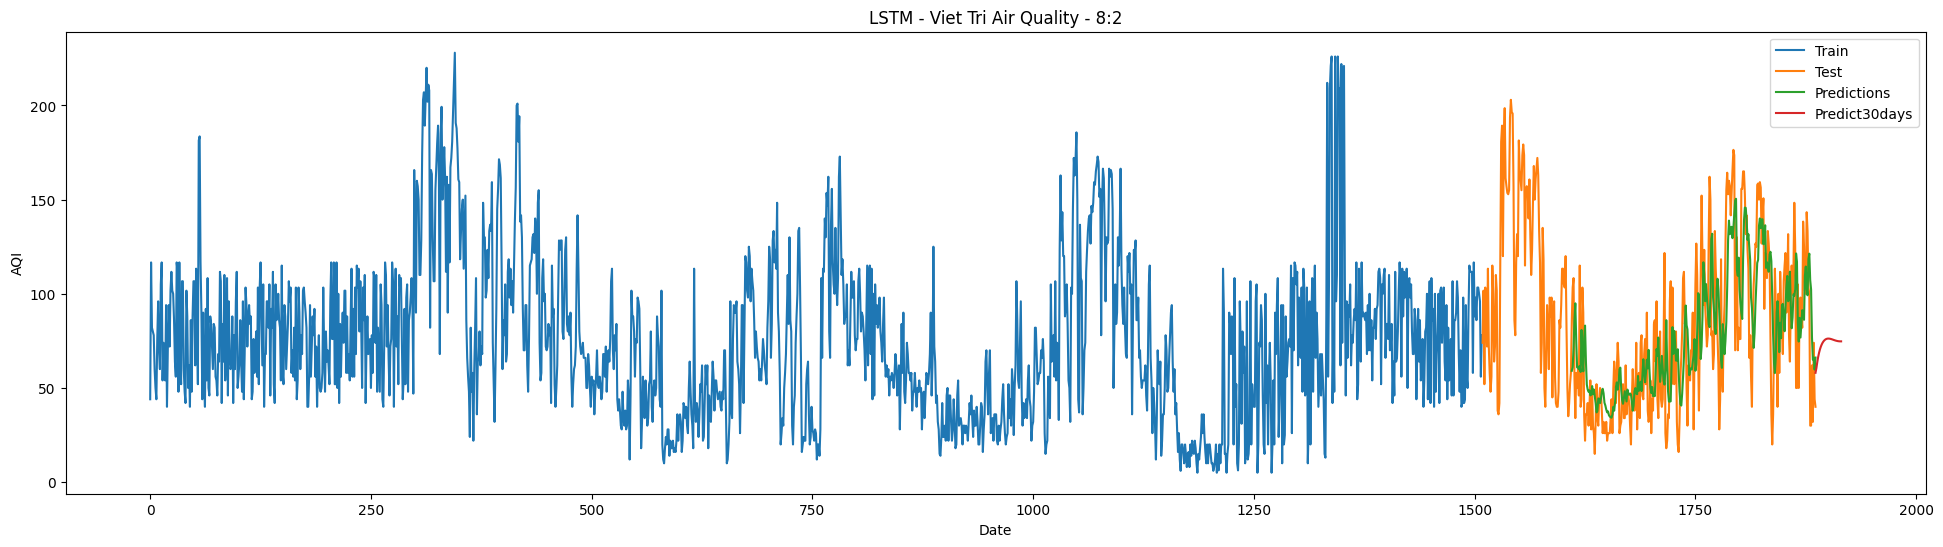

In [78]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))

test_data_index = pd.RangeIndex(start=train_size_8_2+101, stop=train_size_8_2+test_size_8_2, step=1)
plt.plot(test_data_index,(y_pred_8_2))

prediect_data_index = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_8_2))

plt.title('LSTM - Viet Tri Air Quality - 8:2')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [79]:
rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 27.290530370268378
MAE: 22.152099545763924
MAPE: 0.4015338517091262


## Viet Tri - train:test 9:1

In [80]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\nph17\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [81]:
model_9_1.fit(X_train_9_1, y_train_9_1, validation_data=(X_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0628 - val_loss: 0.0295
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0238 - val_loss: 0.0290
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0240 - val_loss: 0.0296
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0215 - val_loss: 0.0302
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0226 - val_loss: 0.0300
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0216 - val_loss: 0.0305
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0211 - val_loss: 0.0303
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0204 - val_loss: 0.0298
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0216 - val_loss: 0.0299
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 0.0202 - val_loss: 0.0289
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 0.0200 - val_loss: 0.0276
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step

In [82]:
y_pred_9_1 = model_9_1.predict(X_test_9_1)
# y_pred_9_1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


In [83]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
# y_pred_9_1

In [84]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

In [85]:
x_input_9_1=test_data_9_1[-100:].reshape(1,-1)
x_input_9_1.shape

temp_input_9_1=list(x_input_9_1)
temp_input_9_1=temp_input_9_1[0].tolist()

from numpy import array

lst_output_9_1=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input_9_1)>100):
        # print(temp_input_9_1)
        x_input_9_1=np.array(temp_input_9_1[1:])
        print("{} day input {}".format(i,x_input_9_1))
        x_input_9_1 = x_input_9_1.reshape(1,-1)
        x_input_9_1 = x_input_9_1.reshape((1, n_steps, 1))
        # print(x_input_9_1)
        yhat = model_9_1.predict(x_input_9_1, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input_9_1.extend(yhat[0].tolist())
        temp_input_9_1=temp_input_9_1[1:]
        # print(temp_input_9_1)
        lst_output_9_1.extend(yhat.tolist())
        i=i+1
    else:
        x_input_9_1 = x_input_9_1.reshape((1, n_steps,1))
        yhat = model_9_1.predict(x_input_9_1, verbose=0)
        print(yhat[0])
        temp_input_9_1.extend(yhat[0].tolist())
        print(len(temp_input_9_1))
        lst_output_9_1.extend(yhat.tolist())
        i=i+1

[0.26004156]
101
1 day input [0.69506726 0.68225496 0.61285501 0.66944266 0.72069186 0.76873799
 0.75592569 0.29147982 0.42600897 0.56053812 0.29147982 0.34529148
 0.31838565 0.31838565 0.67584881 0.67584881 0.71748879 0.71748879
 0.66303652 0.56801196 0.61285501 0.53064275 0.4857997  0.2735426
 0.32735426 0.22869955 0.15695067 0.37219731 0.44843049 0.4857997
 0.54559043 0.53811659 0.68545804 0.68866111 0.65022422 0.69186419
 0.67905189 0.54559043 0.61285501 0.65342729 0.39013453 0.52316891
 0.47085202 0.46337818 0.5754858  0.54559043 0.50074738 0.30941704
 0.13901345 0.06726457 0.13901345 0.30941704 0.4857997  0.39910314
 0.30044843 0.15695067 0.42600897 0.23766816 0.47832586 0.39910314
 0.34529148 0.28251121 0.45590433 0.49327354 0.52316891 0.38116592
 0.43348281 0.56801196 0.32735426 0.26457399 0.39910314 0.49327354
 0.42600897 0.47832586 0.64275037 0.53811659 0.20179372 0.20179372
 0.44843049 0.20179372 0.40807175 0.41704036 0.37219731 0.34529148
 0.59790732 0.53811659 0.43348281 0

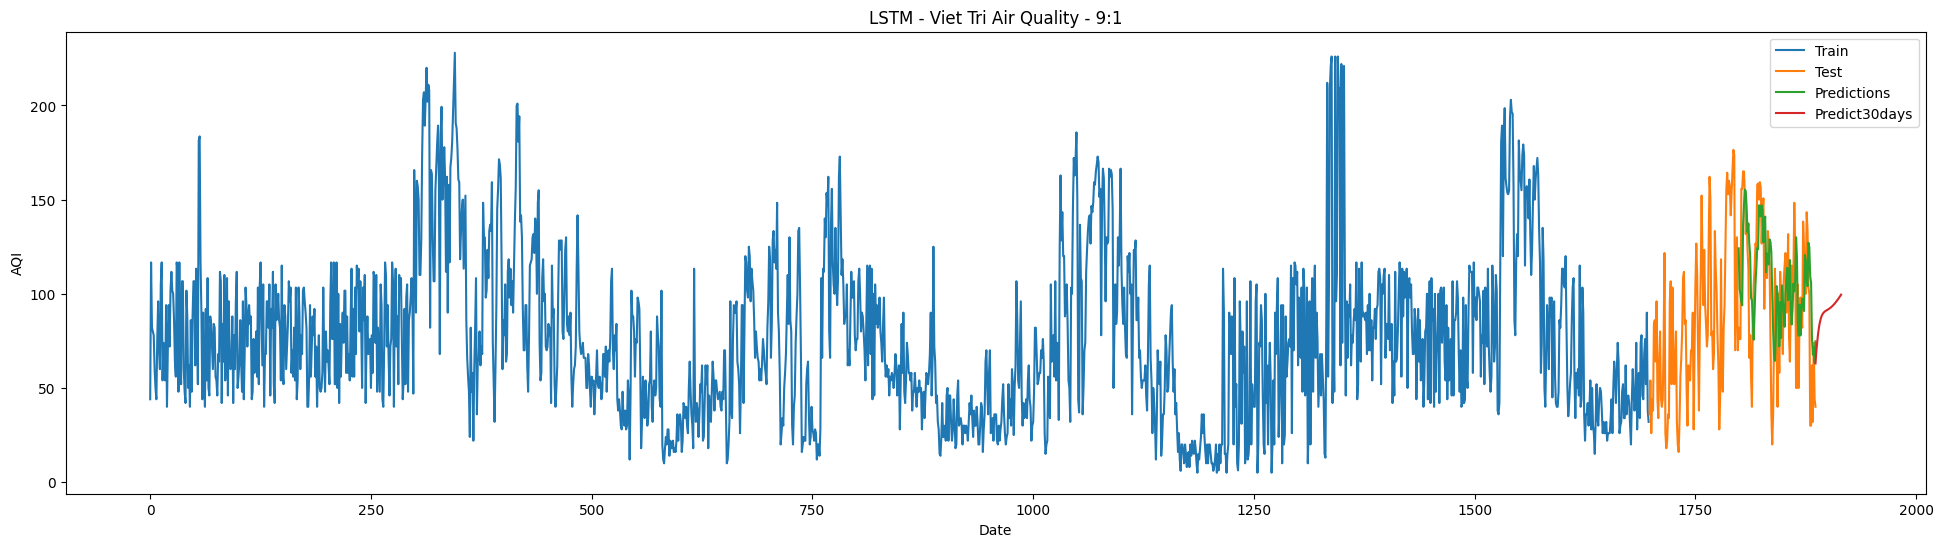

In [90]:
plt.figure(figsize=(24, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))

test_data_index = pd.RangeIndex(start=train_size_9_1+101, stop=train_size_9_1+test_size_9_1, step=1)
plt.plot(test_data_index,(y_pred_9_1))

prediect_data_index = pd.RangeIndex(start=len(df_vt)-1, stop=len(df_vt)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output_9_1))

plt.title('LSTM - Viet Tri Air Quality - 9:1')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend(['Train','Test','Predictions', 'Predict30days'])
plt.show()

In [91]:
rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 29.16791927436587
MAE: 23.468571305791023
MAPE: 0.3668710128759322
